# World Happiness 


The world happiness report is an annual report that is published by the United Nations Sustainable Development Solutions Network. This survey was formerly taken in the year 2012. The world happiness report records the happiness score for 156 countries based on various attributes.  The attributes used in this notebook are as follows:<br>
<li>Country
<li>Score
<li>Economy
<li>Family
<li>Health
<li>Freedom
<li>Trust
<li>Generosity
<li>Year<br>
In this notebook, we use the "World Happiness" dataset for the year 2015-2020 and try to understand the factors that influence the score of happiness. Later, we will play around with the dataset and build a predictive model.<br> A detailed visual report can be viewed in the below Tableau Public links.<br><br>
1. <a href="https://public.tableau.com/profile/ginelle.d.souza#!/vizhome/1WorldHappiness/Happinesswithrespecttocountries">Happiness per country</a><br>
2. <a href="https://public.tableau.com/profile/ginelle.d.souza#!/vizhome/2WorldHappiness/Relationofattributeswithoneanother">Relation between attributes</a><br>
3. <a href="https://public.tableau.com/profile/ginelle.d.souza#!/vizhome/3WorldHappiness/Impactoftrustandeconomyonhappiness">Impact of trust and economy</a><br>
4. <a href="https://public.tableau.com/profile/ginelle.d.souza#!/vizhome/4WorldHappiness/EffectofEconomyonFreedom">Effect of Economy on Freedom</a>

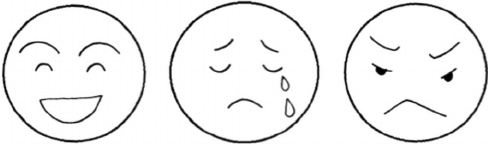

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
year_2015 = pd.read_csv("/kaggle/input/world-happiness-report/2015.csv")
year_2016 = pd.read_csv("/kaggle/input/world-happiness-report/2016.csv")
year_2017 = pd.read_csv("/kaggle/input/world-happiness-report/2017.csv")
year_2018 = pd.read_csv("/kaggle/input/world-happiness-report/2018.csv")
year_2019 = pd.read_csv("/kaggle/input/world-happiness-report/2019.csv")
year_2020 = pd.read_csv("/kaggle/input/world-happiness-report/2020.csv")

In [ ]:
year_2015 = year_2015[['Country','Happiness Score','Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                       'Generosity']]
year_2015['Year'] = 2015
year_2015.rename(columns = {'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'Economy',
                                                        'Health (Life Expectancy)': 'Health', 
                                                        'Trust (Government Corruption)': 'Trust'}, inplace = True)



year_2016 = year_2016[['Country', 'Happiness Score','Economy (GDP per Capita)', 'Family', 
                       'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 
                       'Generosity']]
year_2016['Year'] = 2016
year_2016.rename(columns = {'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'Economy',
                            'Health (Life Expectancy)': 'Health','Trust (Government Corruption)': 'Trust'}, 
                 inplace = True)



year_2017 = year_2017[['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
                       'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.',
                       'Generosity']]
year_2017['Year'] = 2017
year_2017.rename(columns = {'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'Economy',
                            'Health..Life.Expectancy.': 'Health','Trust..Government.Corruption.': 'Trust'}, 
                 inplace = True)



year_2018 = year_2018[['Country or region', 'Score', 'GDP per capita', 'Social support', 
                       'Healthy life expectancy','Freedom to make life choices','Perceptions of corruption',
                       'Generosity']]
year_2018['Year'] = 2018
year_2018.rename(columns = {'Country or region': 'Country', 'GDP per capita': 'Economy','Social support':'Family',
                            'Healthy life expectancy': 'Health', 'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption': 'Trust'}, inplace = True)



year_2019 = year_2019[['Country or region', 'Score', 'GDP per capita','Social support',
                       'Healthy life expectancy','Freedom to make life choices','Perceptions of corruption',
                       'Generosity']]
year_2019['Year'] = 2019
year_2019.rename(columns = {'Country or region': 'Country', 'GDP per capita': 'Economy','Social support':'Family',
                            'Healthy life expectancy': 'Health', 'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption': 'Trust'}, inplace = True)



year_2020 = year_2020[['Country name', 'Ladder score','Logged GDP per capita', 'Social support', 
                       'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption',
                       'Generosity']]
year_2020['Year'] = 2020
year_2020.rename(columns = {'Country name': 'Country','Ladder score': 'Score', 'Logged GDP per capita': 'Economy',
                            'Social support':'Family', 'Healthy life expectancy': 'Health', 
                            'Freedom to make life choices':'Freedom','Perceptions of corruption': 'Trust'},
                 inplace = True)

In [ ]:
frames = [year_2015, year_2016, year_2017, year_2018, year_2019, year_2020]
df = pd.concat(frames)

In [ ]:
df.head()

In [ ]:
df.shape

## Data Visualization

In [ ]:
df['Positive'] = df ['Family'] + df['Health'] + df ['Freedom'] + df ['Generosity']
df['Negative'] = df['Trust'] + df['Economy'] 

In [ ]:
sns.boxplot('Year','Score',data=df)

The year 2020 has the lowest happiness score as compared to the rest of the years  

In [ ]:
Top = df.groupby('Country').sum().sort_values(by='Score',ascending=False).drop('Year', axis=1)[:10]
plt.figure(figsize=(10,3))
Top['Score'].plot()

Finland has the highest cummulative happiness score for the given 6 years.

In [ ]:
fig = plt.figure(figsize = (16, 8))
(ax1, ax2,ax3), (ax4,ax5, ax6) = fig.subplots(2,3)


ax1.set_title("Trust in the government 2015")
df[df['Year'] == 2015][['Country','Trust']][:10].set_index('Country').plot(kind='bar', ax=ax1, legend=False)

ax2.set_title("Trust in the government 2016")
df[df['Year'] == 2016][['Country','Trust']][:10].set_index('Country').plot(kind='bar', ax=ax2, legend=False)

ax3.set_title("Trust in the government 2017")
df[df['Year'] == 2017][['Country','Trust']][:10].set_index('Country').plot(kind='bar', ax=ax3, legend=False)

ax4.set_title("Trust in the government 2018")
df[df['Year'] == 2018][['Country','Trust']][:10].set_index('Country').plot(kind='bar', ax=ax4, legend=False)

ax5.set_title("Trust in the government 2019")
df[df['Year'] == 2019][['Country','Trust']][:10].set_index('Country').plot(kind='bar', ax=ax5, legend=False)

ax6.set_title("Trust in the government 2020")
df[df['Year'] == 2020][['Country','Trust']][:10].set_index('Country').plot(kind='bar', ax=ax6, legend=False)

plt.tight_layout(pad=0.3)

The above is a depiction of the top 10 happiest countries in the world and their trust in the government. We observe in the year 2020, many countries have lost their trust in the government. Iceland is the only country that has an increasing trust in their government over the years.

In [ ]:
table = pd.pivot_table(df, values=['Freedom','Trust','Family'], index=['Year'],aggfunc=np.sum)
table.plot(kind='bar',figsize=(8,4))
plt.legend(shadow=True)

There is a massive drop in the number of family support received by individuals in 2020, but we observe an increase in freedom of speech among the people and trust in the government.

In [ ]:
plt.figure(figsize=(8,3))
sns.lineplot(x = "Year", y = "Economy", data=df, label='Economy')
sns.lineplot(x = "Year", y = "Family", data=df, label='Family')
plt.legend(shadow=True)

The economy has increased over time.

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Year', y='Freedom', data=df, label='Freedom')
sns.lineplot(x='Year', y='Trust', data=df, label='Trust')
sns.lineplot(x='Year', y='Generosity', data=df, label='Generosity') 
plt.legend(shadow=True)

Over the years, freedom and generosity have perpetually been more than trust in governments. The last year has made drastic changes in these attributes. Generosity among people experiences an abrupt fall. Whereas, Freedom and Trust in the government have increased.  

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
df.Freedom.hist(bins=10)
plt.xlabel("Freedom")
plt.title("Freedom range and its frequency")

plt.subplot(1,2,2)
df.Family.hist(bins=10)
plt.xlabel("Family")
plt.title("Family range and its frequency")

plt.tight_layout(pad=0.3)

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
df.Trust.hist(bins=10)
plt.xlabel("Trust")
plt.title("Trust range and its frequency")

plt.subplot(1,2,2)
df.Generosity.hist(bins=10)
plt.xlabel("Generosity")
plt.title("Generosity range and its frequency")

plt.tight_layout(pad=0.3)

Over the years, for the four attributes: freedom, family, trust, and generosity, we can assert that many countries endured about 40-55% freedom in their countries. Trusting a government differs from nations, but it appears like many countries have very low faith in their government. People are generosity scales between 10-25%. Whereas, the support given by families is large.

In [ ]:
sns.boxplot('Year','Generosity',data=df)

Generosity among people experiences a downfall. Negative values are observed that indicate our generosity does not exist this year.

In [ ]:
Happy = df.groupby('Country').sum().sort_values(by='Score',ascending=False).drop('Year', axis=1)[:50]
Least = df.groupby('Country').sum().sort_values(by='Score',ascending=False).drop('Year', axis=1)[-50:]

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Economy of top 10 Happy countries")
Happy['Economy'][:10].plot(kind='bar')

plt.subplot(2,2,2)
plt.title("Trust in government of top 10 Happy countries")
Happy['Trust'][:10].plot(kind='bar')

plt.subplot(2,2,3)
plt.title("Economy of top 10 least happy countries")
Least['Economy'][-10:].plot(kind='bar')


plt.subplot(2,2,4)
plt.title("Trust in government of top 10 least happy countries")
Least['Trust'][-10:].plot(kind='bar')

plt.tight_layout(pad=0.3)

In countries that have a higher happiness score, we observe that they have a well-built economy than those with a lower happiness score. Comparatively, the trust in the government among higher and lower scored countries, the countries with low happiness scores have less than the average trust in their government. Whereas some countries with a higher have good faith in their government.

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title("Generosity of top 10 Happy countries")
Happy['Generosity'][:10].plot(kind='barh')

plt.subplot(1,2,2)
plt.title("Generosity of top 10 least happy countries")
Least['Generosity'][-10:].plot(kind='barh')

plt.tight_layout(pad=0.3)

New Zealand and Iceland prove to be the most generous country. The Gambia, although having a lower happiness score does not hold back at being generous to their people.

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title("Relation of variables in happy countries")
correaltion_happy = Happy.corr()
sns.heatmap(correaltion_happy)

plt.subplot(1,2,2)
plt.title("Relation of variables in least happy countries")
correaltion_Least = Least.corr()
sns.heatmap(correaltion_Least)

plt.tight_layout(pad=0.3)

We observe that there may not be many factors that influence the happiness score for happier countries. But certainly, many factors determine the score for other countries such as health, economy, freedom, positives, and negatives.

In [ ]:
plt.figure(figsize=(15,3))

plt.suptitle("Correlation Between Attributes")

plt.subplot(1,2,1)
plt.title("Postive Correlation")
plt.scatter(Happy['Health'],Happy['Positive'], marker='v')
plt.xlabel("Health")
plt.ylabel("Positive")

plt.subplot(1,2,2)
plt.title("No Correlation")
plt.scatter(Happy['Economy'],Happy['Freedom'], marker='v')
plt.xlabel("Economy")
plt.ylabel("Freedom")

In [ ]:
plt.figure(figsize=(15,3))

plt.suptitle("Correlation Between Attributes")

plt.subplot(1,2,1)
plt.title("Postive Correlation")
plt.scatter(Least['Economy'],Least['Negative'], marker='v')
plt.xlabel("Economy")
plt.ylabel("Negative")

plt.subplot(1,2,2)
plt.title("No Correlation")
plt.scatter(Least['Economy'],Least['Health'], marker='v')
plt.xlabel("Economy")
plt.ylabel("Health")

Realations between attributes.

# Summary Of Observations

<li>Although for some the happiness score may have increased in the year 2020 many countries faced a downfall of score never seen in 5 years.
<li>Finland ranks first for 3 consecutive years with the highest score being 7.5.
<li>Trust in the government and support of family has fallen over the years.
<li>In the year 2020, generosity among people has faced a sharp impact.
<li>There is a vast difference in the economic state of countries, which may be a big factor impacting the happiness of the countries.
<li>New Zealand and Iceland are the most generous country whereas The Gambia, although having a lower happiness are very generous to their people.
<li>Many factors influence the happiness score some of them are: health, economy, and freedom.

## Data Cleaning

In [ ]:
def showbox():
    
    plt.figure(figsize = (16, 5))

    plt.subplot(2,3,1)
    sns.boxplot('Score',data=df)

    plt.subplot(2,3,2)
    sns.boxplot('Economy',data=df)

    plt.subplot(2,3,3)
    sns.boxplot('Family',data=df)

    plt.subplot(2,3,4)
    sns.boxplot('Health',data=df)

    plt.subplot(2,3,5)
    sns.boxplot('Freedom',data=df)

    plt.subplot(2,3,6)
    sns.boxplot('Trust',data=df)

    plt.tight_layout(pad=0.3)

In [ ]:
showbox()

We see there are many outliers present in our dataset. Thus before modeling the data, we deal with these outliers.

In [ ]:
outlier = 1
while outlier > 0:
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outlier = len(np.where((df > upper_bound) | (df < lower_bound))[0]) 
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Year'] = encoder.fit_transform(df['Year'])

In [ ]:
df.head()

# Data Modeling

For the purpose of Data Modeling we need to split our data into training and test set. Once the split is done we can put our data into various models and check the precision of each model. We select the model with the highest precision score.

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Lasso, LinearRegression, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [ ]:
X = df.drop(['Score','Country'], axis=1)
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 1. LinearRegression

In [ ]:
lrm = LinearRegression(normalize=True)
lrm.fit(X_train,y_train)
predictionslrm = lrm.predict(X_test)

In [ ]:
scorelrm = round((lrm.score(X_test, y_test)*100),2)
print ("Model Score:",scorelrm,"%")

## 2.Ridge Cross-Validation

In [ ]:
model_RFR = RidgeCV(cv=3)
model_RFR.fit(X_train, y_train)
predictionsRFR = model_RFR.predict(X_test)

In [ ]:
scoreRFR = round((model_RFR.score(X_test, y_test)*100),2)
print ("Model Score:",scoreRFR,"%")

## 3. Lasso Regression

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42, max_iter=4000))
lasso.fit(X_train, y_train)
predictionslasso = lasso.predict(X_test)

In [ ]:
scorelasso = round((lasso.score(X_test, y_test)*100),2)
print ("Model Score:",scorelasso,"%")

## 4. Kernel Ridge Regression

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2)
KRR.fit(X_train, y_train)
predictionsKRR = KRR.predict(X_test)

In [ ]:
scoreKRR = round((KRR.score(X_test, y_test)*100),2)
print ("Model Score:",scoreKRR,"%")

## 5. Gradient Boosting Regression

In [ ]:
GBoost = GradientBoostingRegressor(learning_rate=0.005, max_depth=3,n_estimators=2200,
                                   random_state =42)
GBoost.fit(X_train, y_train)
predictionsGBoost = GBoost.predict(X_test)

In [ ]:
scoreGBoost = round((GBoost.score(X_test, y_test)*100),2)
print ("Model Score:",scoreGBoost,"%")

## 6. XGBoost

In [ ]:
model_xgb = xgb.XGBRegressor(learning_rate=0.005, max_depth=3, 
                             min_child_weight=1.7, n_estimators=2200,
                             random_state =42)
model_xgb.fit(X_train, y_train)
predictionsxgb = model_xgb.predict(X_test)

In [ ]:
scorexgb = round((model_xgb.score(X_test, y_test)*100),2)
print ("Model Score:",scorexgb,"%")